In [2]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values
## normalize and reshape the predictors
train_x = train_x / 255
## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [4]:
input_layer = Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)
## latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer3)
## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)
## output layer
output_layer = Dense(784)(decode_layer3)
model = Model(input_layer, output_layer)

In [5]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 8s 330ms/step - loss: 0.0926 - val_loss: 0.0678
Epoch 2/20
24/24 [==============================] - 7s 303ms/step - loss: 0.0637 - val_loss: 0.0564
Epoch 3/20
24/24 [==============================] - 7s 304ms/step - loss: 0.0499 - val_loss: 0.0435
Epoch 4/20
24/24 [==============================] - 7s 297ms/step - loss: 0.0409 - val_loss: 0.0378
Epoch 5/20
24/24 [==============================] - 7s 297ms/step - loss: 0.0369 - val_loss: 0.0353
Epoch 6/20
24/24 [==============================] - 7s 309ms/step - loss: 0.0333 - val_loss: 0.0310
Epoch 7/20
24/24 [==============================] - 7s 303ms/step - loss: 0.0293 - val_loss: 0.0275
Epoch 8/20
24/24 [==============================] - 8s 318ms/step - loss: 0.0268 - val_loss: 0.0258
Epoch 9/20
24/24 [==============================] - 7s 300ms/step - loss: 0.0254 - val_loss: 0.0250
Epoch 10/20
24/24 [==============================] - 8s 320ms/step - loss: 0.0242 - val_loss: 0.0239

In [6]:
preds = model.predict(val_x)

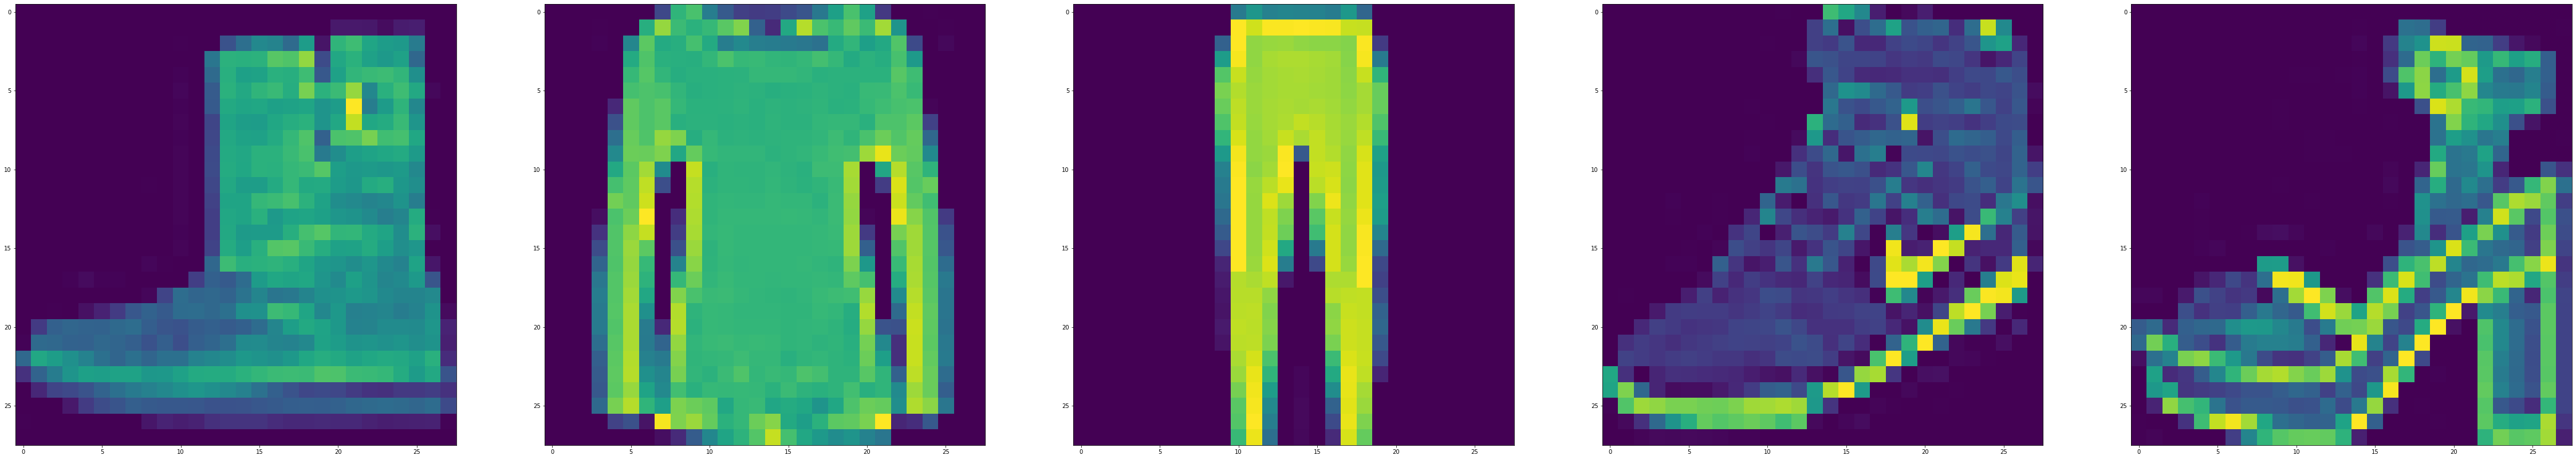

In [8]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

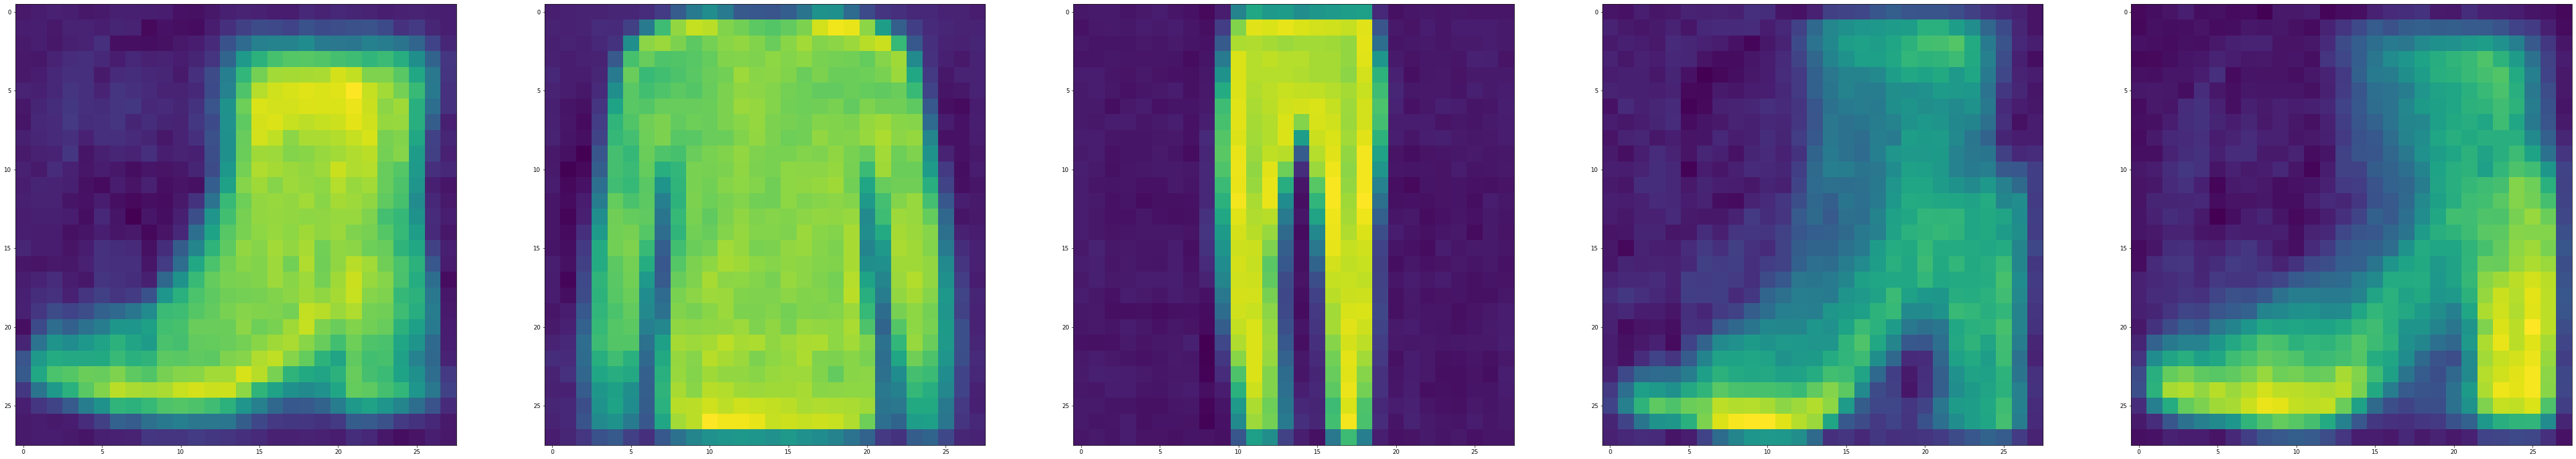

In [9]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

In [10]:
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)
## normalize and reshape
train_x = train_x/255.
val_x = val_x/255.

In [11]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [12]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

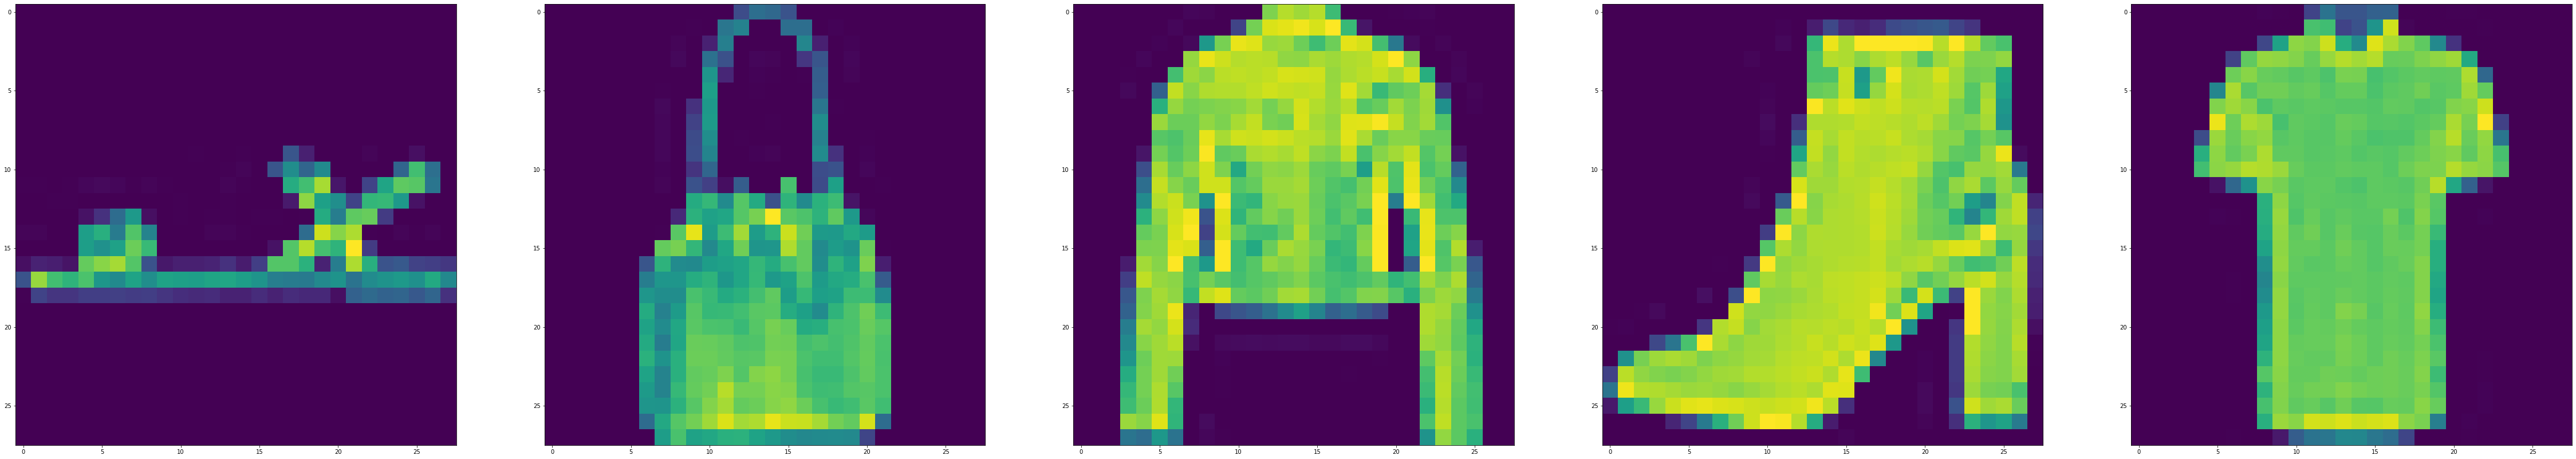

In [13]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

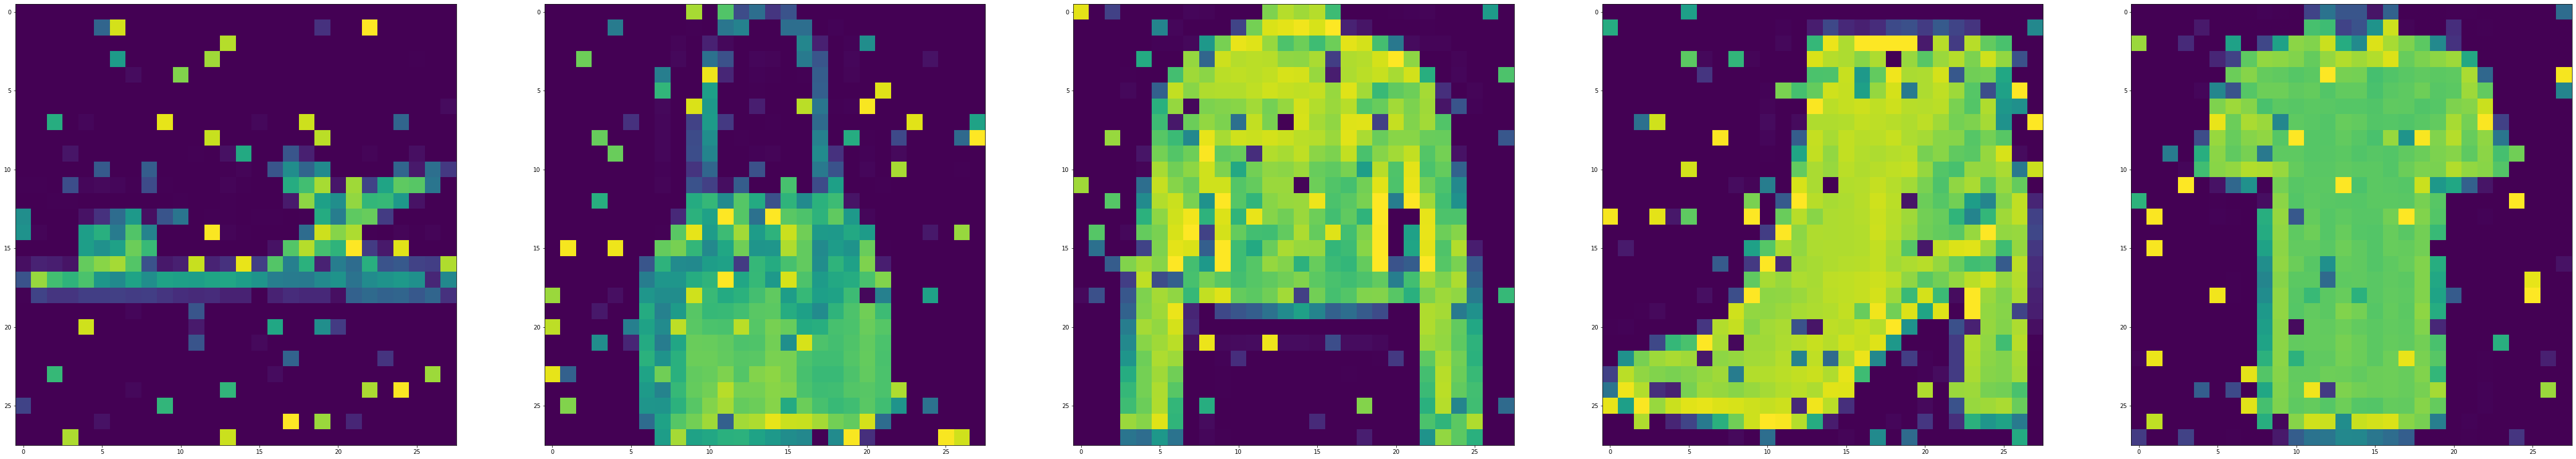

In [14]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [15]:
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [16]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0   

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 93s 4s/step - loss: 0.0928 - val_loss: 0.0575
Epoch 2/10
24/24 [==============================] - 95s 4s/step - loss: 0.0461 - val_loss: 0.0372
Epoch 3/10
24/24 [==============================] - 85s 4s/step - loss: 0.0340 - val_loss: 0.0307
Epoch 4/10
24/24 [==============================] - 82s 3s/step - loss: 0.0289 - val_loss: 0.0270
Epoch 5/10
24/24 [==============================] - 87s 4s/step - loss: 0.0257 - val_loss: 0.0243
Epoch 6/10
24/24 [==============================] - 87s 4s/step - loss: 0.0235 - val_loss: 0.0227
Epoch 7/10
24/24 [==============================] - 82s 3s/step - loss: 0.0220 - val_loss: 0.0213
Epoch 8/10
24/24 [==============================] - 93s 4s/step - loss: 0.0210 - val_loss: 0.0205
Epoch 9/10
24/24 [==============================] - 88s 4s/step - loss: 0.0200 - val_loss: 0.0196
Epoch 10/10
24/24 [==============================] - 88s 4s/step - loss: 0.0193 - val_loss: 0.0189


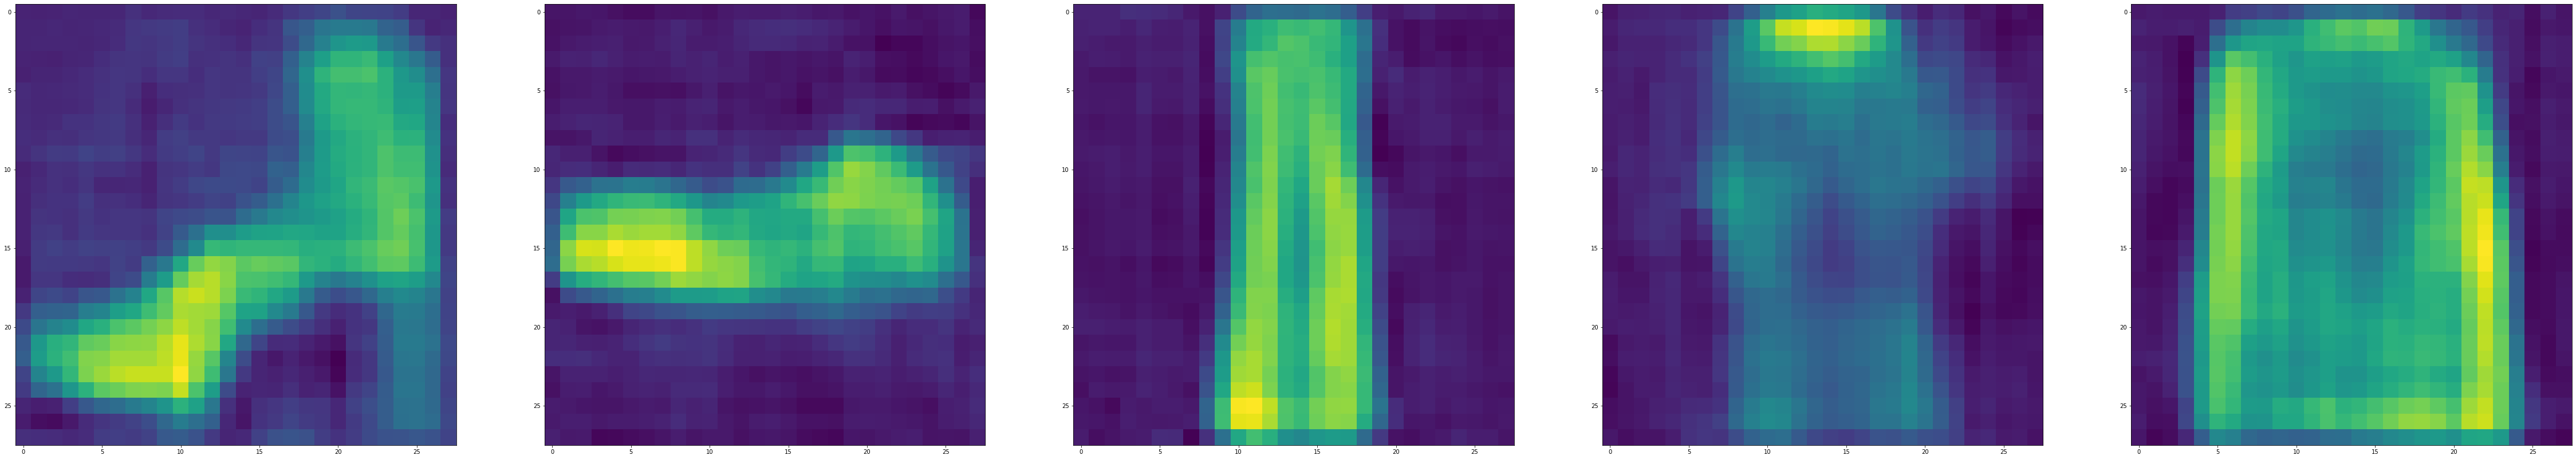

In [19]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()